In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gdp_pop = pd.read_csv('gdp_population_predicted_2024.csv')

In [5]:
len(gdp_pop['Country Code'].unique())

162

In [6]:
gdp_pop.head()

,Country Name,Country Code,Year,GDP,Population,GDP_lag_1,GDP_lag_2,GDP_lag_3,GDP_growth_1yr,Population_growth_1yr,GDP_per_capita
0,Albania,ALB,1983,1.881413e+09,2843960.0,1.861163e+09,1.808177e+09,1.578102e+09,0.010880,NaN,661.546782
1,Albania,ALB,1984,1.857338e+09,2904429.0,1.881413e+09,1.861163e+09,1.808177e+09,-0.012796,60469.0,639.484730
2,Albania,ALB,1985,1.897050e+09,2964762.0,1.857338e+09,1.881413e+09,1.861163e+09,0.021381,60333.0,639.865904
3,Albania,ALB,1986,2.097326e+09,3022635.0,1.897050e+09,1.857338e+09,1.881413e+09,0.105572,57873.0,693.873475
4,Albania,ALB,1987,2.080796e+09,3083605.0,2.097326e+09,1.897050e+09,1.857338e+09,-0.007881,60970.0,674.793383


In [7]:
emissions = pd.read_csv('cleaned_total_emissions.csv')

In [8]:
len(emissions['ISO'].unique())

155

In [9]:
print(gdp_pop.head())

  Country Name Country Code  Year           GDP  Population     GDP_lag_1  \
0      Albania          ALB  1983  1.881413e+09   2843960.0  1.861163e+09   
1      Albania          ALB  1984  1.857338e+09   2904429.0  1.881413e+09   
2      Albania          ALB  1985  1.897050e+09   2964762.0  1.857338e+09   
3      Albania          ALB  1986  2.097326e+09   3022635.0  1.897050e+09   
4      Albania          ALB  1987  2.080796e+09   3083605.0  2.097326e+09   

      GDP_lag_2     GDP_lag_3  GDP_growth_1yr  Population_growth_1yr  \
0  1.808177e+09  1.578102e+09        0.010880                    NaN   
1  1.861163e+09  1.808177e+09       -0.012796                60469.0   
2  1.881413e+09  1.861163e+09        0.021381                60333.0   
3  1.857338e+09  1.881413e+09        0.105572                57873.0   
4  1.897050e+09  1.857338e+09       -0.007881                60970.0   

   GDP_per_capita  
0      661.546782  
1      639.484730  
2      639.865904  
3      693.873475  
4   

In [10]:
emissions = emissions[emissions["Country"] != "World"]


In [11]:
len(emissions['Country'].unique())

154

In [12]:
# Get unique countries from each dataset
gdp_countries = set(gdp_pop['Country Code'].unique())
emissions_countries = set(emissions['ISO'].unique())

# Countries in emissions but NOT in gdp_pop
only_in_emissions = emissions_countries - gdp_countries
print(f"Countries only in emissions ({len(only_in_emissions)}):")
print(sorted(only_in_emissions))

print("\n" + "="*50 + "\n")

# Countries in gdp_pop but NOT in emissions
only_in_gdp = gdp_countries - emissions_countries
print(f"Countries only in gdp_pop ({len(only_in_gdp)}):")
print(sorted(only_in_gdp))

print("\n" + "="*50 + "\n")

# Common countries
common = gdp_countries & emissions_countries
print(f"Common countries: {len(common)}")

Countries only in emissions (1):
['COK']


Countries only in gdp_pop (9):
['BMU', 'FRO', 'GRL', 'HKG', 'MCO', 'NAM', 'NCL', 'PRI', 'PYF']


Common countries: 153


In [13]:
removed_country_iso = ["COK"]

In [14]:
len(emissions['Country'].unique())

154

In [15]:
emissions = emissions[~emissions["ISO"].isin(removed_country_iso)]

In [16]:
len(emissions['Country'].unique())

153

In [17]:
removed_country_codes = ['BMU', 'FRO', 'GRL', 'HKG', 'MCO', 'NAM', 'NCL', 'PRI', 'PYF']

In [18]:
len(gdp_pop['Country Code'].unique())

162

In [19]:
gdp_pop = gdp_pop[~gdp_pop["Country Code"].isin(removed_country_codes)]

In [20]:
len(gdp_pop['Country Code'].unique())

153

In [21]:
emissions.head()

,ISO,Country,Year,Total_Emissions
0,ALB,Albania,1990,11.37
1,ALB,Albania,1991,9.01
2,ALB,Albania,1992,6.97
3,ALB,Albania,1993,6.94
4,ALB,Albania,1994,7.75


In [22]:
# Merge emissions and gdp_pop
df_merged = pd.merge(
    emissions,
    gdp_pop,
    left_on=['ISO', 'Year'],
    right_on=['Country Code', 'Year'],
    how='inner'
)

In [23]:
# Check the result
print(f"Merged dataframe shape: {df_merged.shape}")
print(f"Columns: {df_merged.columns.tolist()}")
df_merged.head()

Merged dataframe shape: (4743, 14)
Columns: ['ISO', 'Country', 'Year', 'Total_Emissions', 'Country Name', 'Country Code', 'GDP', 'Population', 'GDP_lag_1', 'GDP_lag_2', 'GDP_lag_3', 'GDP_growth_1yr', 'Population_growth_1yr', 'GDP_per_capita']


,ISO,Country,Year,Total_Emissions,Country Name,Country Code,GDP,Population,GDP_lag_1,GDP_lag_2,GDP_lag_3,GDP_growth_1yr,Population_growth_1yr,GDP_per_capita
0,ALB,Albania,1990,11.37,Albania,ALB,2.028554e+09,3286542.0,2.253090e+09,2.051236e+09,2.080796e+09,-0.099657,58599.0,617.230436
1,ALB,Albania,1991,9.01,Albania,ALB,1.099559e+09,3266790.0,2.028554e+09,2.253090e+09,2.051236e+09,-0.457959,-19752.0,336.586995
2,ALB,Albania,1992,6.97,Albania,ALB,6.521750e+08,3247039.0,1.099559e+09,2.028554e+09,2.253090e+09,-0.406876,-19751.0,200.852220
3,ALB,Albania,1993,6.94,Albania,ALB,1.185315e+09,3227287.0,6.521750e+08,1.099559e+09,2.028554e+09,0.817481,-19752.0,367.279225
4,ALB,Albania,1994,7.75,Albania,ALB,1.880951e+09,3207536.0,1.185315e+09,6.521750e+08,1.099559e+09,0.586878,-19751.0,586.416135


In [24]:
df_merged.to_csv('emissions_gdp_population_2024.csv', index=False)

In [25]:
# Drop redundant columns (Country Code is same as ISO, Country Name is same as Country)
df_merged = df_merged.drop(columns=['Country Code', 'Country Name'])

print(f"Final columns: {df_merged.columns.tolist()}")
df_merged.head()

Final columns: ['ISO', 'Country', 'Year', 'Total_Emissions', 'GDP', 'Population', 'GDP_lag_1', 'GDP_lag_2', 'GDP_lag_3', 'GDP_growth_1yr', 'Population_growth_1yr', 'GDP_per_capita']


,ISO,Country,Year,Total_Emissions,GDP,Population,GDP_lag_1,GDP_lag_2,GDP_lag_3,GDP_growth_1yr,Population_growth_1yr,GDP_per_capita
0,ALB,Albania,1990,11.37,2.028554e+09,3286542.0,2.253090e+09,2.051236e+09,2.080796e+09,-0.099657,58599.0,617.230436
1,ALB,Albania,1991,9.01,1.099559e+09,3266790.0,2.028554e+09,2.253090e+09,2.051236e+09,-0.457959,-19752.0,336.586995
2,ALB,Albania,1992,6.97,6.521750e+08,3247039.0,1.099559e+09,2.028554e+09,2.253090e+09,-0.406876,-19751.0,200.852220
3,ALB,Albania,1993,6.94,1.185315e+09,3227287.0,6.521750e+08,1.099559e+09,2.028554e+09,0.817481,-19752.0,367.279225
4,ALB,Albania,1994,7.75,1.880951e+09,3207536.0,1.185315e+09,6.521750e+08,1.099559e+09,0.586878,-19751.0,586.416135


In [26]:
# Sort by country and year first
df_merged = df_merged.sort_values(['ISO', 'Year']).reset_index(drop=True)

# Create emission lag features (1, 2, 3 years)
for lag in [1, 2, 3]:
    df_merged[f'Emissions_lag_{lag}'] = df_merged.groupby('ISO')['Total_Emissions'].shift(lag)

# Emission growth rate
df_merged['Emissions_growth_1yr'] = df_merged.groupby('ISO')['Total_Emissions'].pct_change()

# Emissions per capita
df_merged['Emissions_per_capita'] = df_merged['Total_Emissions'] / df_merged['Population']

# Emissions intensity (emissions per unit of GDP)
df_merged['Emissions_intensity'] = df_merged['Total_Emissions'] / df_merged['GDP']

# Fill NaNs in growth columns
df_merged['Emissions_growth_1yr'] = df_merged['Emissions_growth_1yr'].fillna(0)

# Drop rows with NaN in lag columns (first few years per country)
df_merged = df_merged.dropna(subset=['Emissions_lag_1', 'Emissions_lag_2', 'Emissions_lag_3'])

print(f"Final shape: {df_merged.shape}")
df_merged.head()

Final shape: (4284, 18)


,ISO,Country,Year,Total_Emissions,GDP,Population,GDP_lag_1,GDP_lag_2,GDP_lag_3,GDP_growth_1yr,Population_growth_1yr,GDP_per_capita,Emissions_lag_1,Emissions_lag_2,Emissions_lag_3,Emissions_growth_1yr,Emissions_per_capita,Emissions_intensity
3,AGO,Angola,1993,72.68,5.768720e+09,12827135.0,8.307811e+09,1.060378e+10,1.122952e+10,-0.305627,403423.0,449.727895,69.75,68.92,68.49,0.042007,0.000006,1.259898e-08
4,AGO,Angola,1994,75.64,4.438321e+09,13249764.0,5.768720e+09,8.307811e+09,1.060378e+10,-0.230623,422629.0,334.973590,72.68,69.75,68.92,0.040726,0.000006,1.704248e-08
5,AGO,Angola,1995,78.78,5.538749e+09,13699778.0,4.438321e+09,5.768720e+09,8.307811e+09,0.247938,450014.0,404.294818,75.64,72.68,69.75,0.041512,0.000006,1.422343e-08
6,AGO,Angola,1996,81.71,7.526422e+09,14170973.0,5.538749e+09,4.438321e+09,5.768720e+09,0.358867,471195.0,531.115367,78.78,75.64,72.68,0.037192,0.000006,1.085642e-08
7,AGO,Angola,1997,80.81,7.648380e+09,14660413.0,7.526422e+09,5.538749e+09,4.438321e+09,0.016204,489440.0,521.702915,81.71,78.78,75.64,-0.011015,0.000006,1.056564e-08


In [27]:
# Drop GDP lag columns (not needed for emissions prediction)
df_merged = df_merged.drop(columns=['GDP_lag_1', 'GDP_lag_2', 'GDP_lag_3'])

In [28]:
df_merged.head()

,ISO,Country,Year,Total_Emissions,GDP,Population,GDP_growth_1yr,Population_growth_1yr,GDP_per_capita,Emissions_lag_1,Emissions_lag_2,Emissions_lag_3,Emissions_growth_1yr,Emissions_per_capita,Emissions_intensity
3,AGO,Angola,1993,72.68,5.768720e+09,12827135.0,-0.305627,403423.0,449.727895,69.75,68.92,68.49,0.042007,0.000006,1.259898e-08
4,AGO,Angola,1994,75.64,4.438321e+09,13249764.0,-0.230623,422629.0,334.973590,72.68,69.75,68.92,0.040726,0.000006,1.704248e-08
5,AGO,Angola,1995,78.78,5.538749e+09,13699778.0,0.247938,450014.0,404.294818,75.64,72.68,69.75,0.041512,0.000006,1.422343e-08
6,AGO,Angola,1996,81.71,7.526422e+09,14170973.0,0.358867,471195.0,531.115367,78.78,75.64,72.68,0.037192,0.000006,1.085642e-08
7,AGO,Angola,1997,80.81,7.648380e+09,14660413.0,0.016204,489440.0,521.702915,81.71,78.78,75.64,-0.011015,0.000006,1.056564e-08


In [29]:
# Define features for emissions prediction
emission_features = [
    'GDP', 'GDP_growth_1yr', 'GDP_per_capita',
    'Population', 'Population_growth_1yr',
    'Emissions_lag_1', 'Emissions_lag_2', 'Emissions_lag_3',
    'Emissions_growth_1yr', 'Emissions_per_capita', 'Emissions_intensity'
]

target = 'Total_Emissions'

print(f"Features for emissions prediction: {emission_features}")

Features for emissions prediction: ['GDP', 'GDP_growth_1yr', 'GDP_per_capita', 'Population', 'Population_growth_1yr', 'Emissions_lag_1', 'Emissions_lag_2', 'Emissions_lag_3', 'Emissions_growth_1yr', 'Emissions_per_capita', 'Emissions_intensity']


In [30]:
df_merged.to_csv('emissions_gdp_population_merged.csv', index=False)

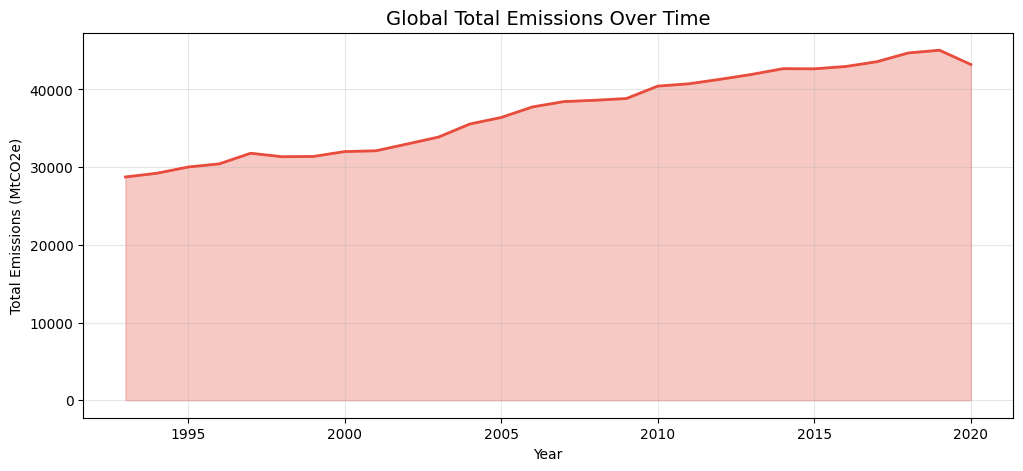

In [31]:
# Global emissions trend
global_emissions = df_merged.groupby('Year')['Total_Emissions'].sum()

plt.figure(figsize=(12, 5))
plt.plot(global_emissions.index, global_emissions.values, linewidth=2, color='#e74c3c')
plt.fill_between(global_emissions.index, global_emissions.values, alpha=0.3, color='#e74c3c')
plt.title('Global Total Emissions Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.grid(True, alpha=0.3)
plt.show()

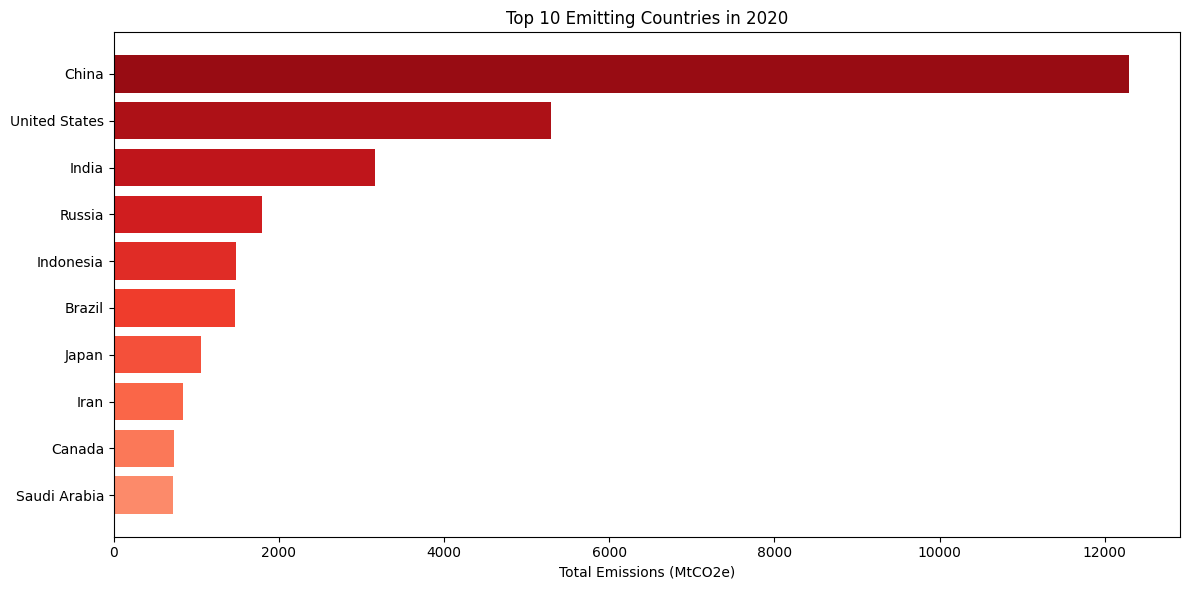

In [32]:
latest_year = df_merged['Year'].max()
top10 = df_merged[df_merged['Year'] == latest_year].nlargest(10, 'Total_Emissions')

plt.figure(figsize=(12, 6))
colors = plt.cm.Reds(np.linspace(0.4, 0.9, 10))[::-1]
plt.barh(top10['Country'], top10['Total_Emissions'], color=colors)
plt.xlabel('Total Emissions (MtCO2e)')
plt.title(f'Top 10 Emitting Countries in {latest_year}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

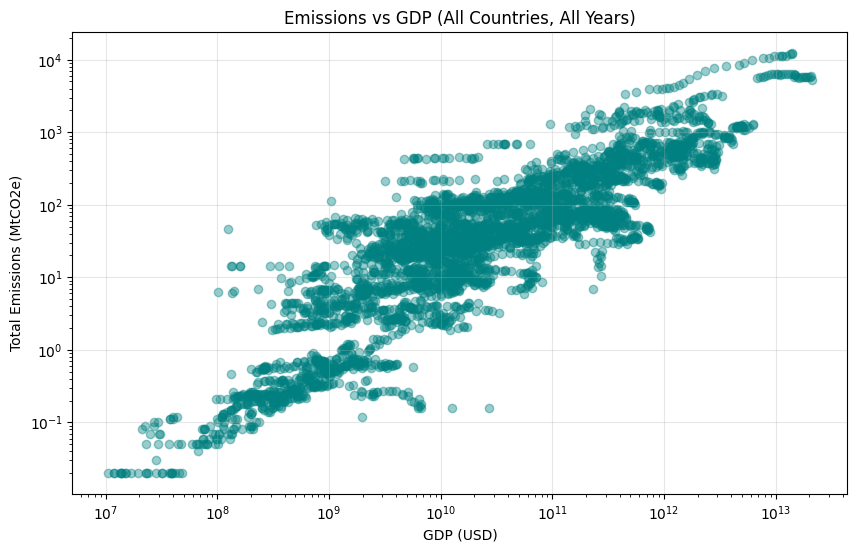

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['GDP'], df_merged['Total_Emissions'], alpha=0.4, c='teal')
plt.xlabel('GDP (USD)')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Emissions vs GDP (All Countries, All Years)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

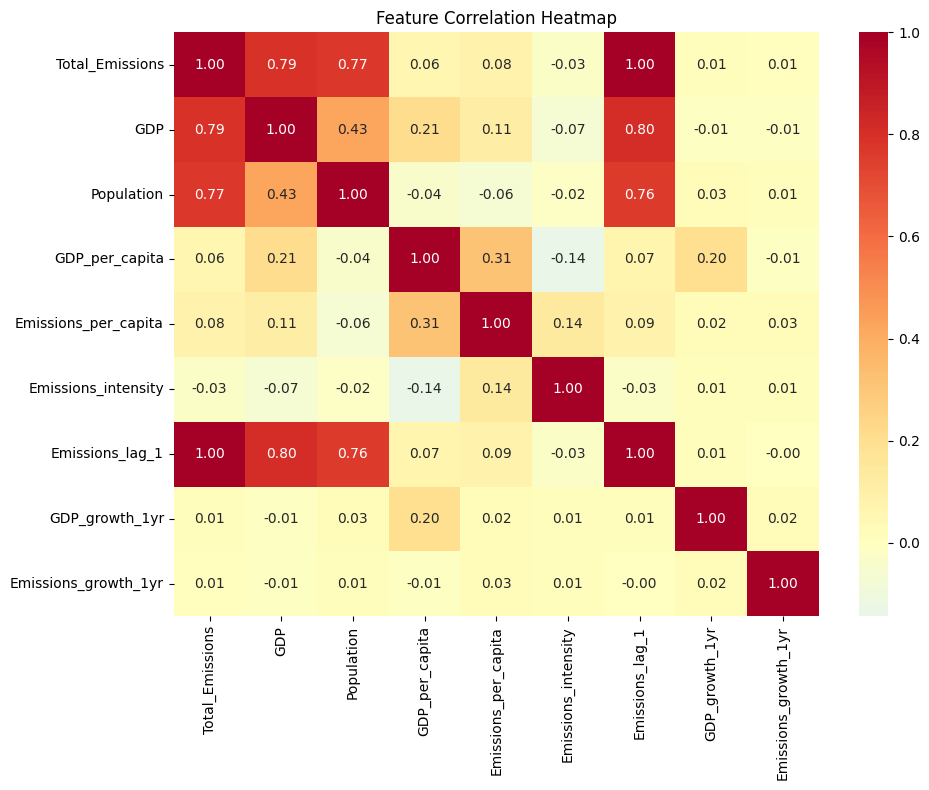

In [34]:
# Select numeric columns for correlation
numeric_cols = ['Total_Emissions', 'GDP', 'Population', 'GDP_per_capita', 
                'Emissions_per_capita', 'Emissions_intensity', 
                'Emissions_lag_1', 'GDP_growth_1yr', 'Emissions_growth_1yr']

plt.figure(figsize=(10, 8))
corr = df_merged[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='RdYlBu_r', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

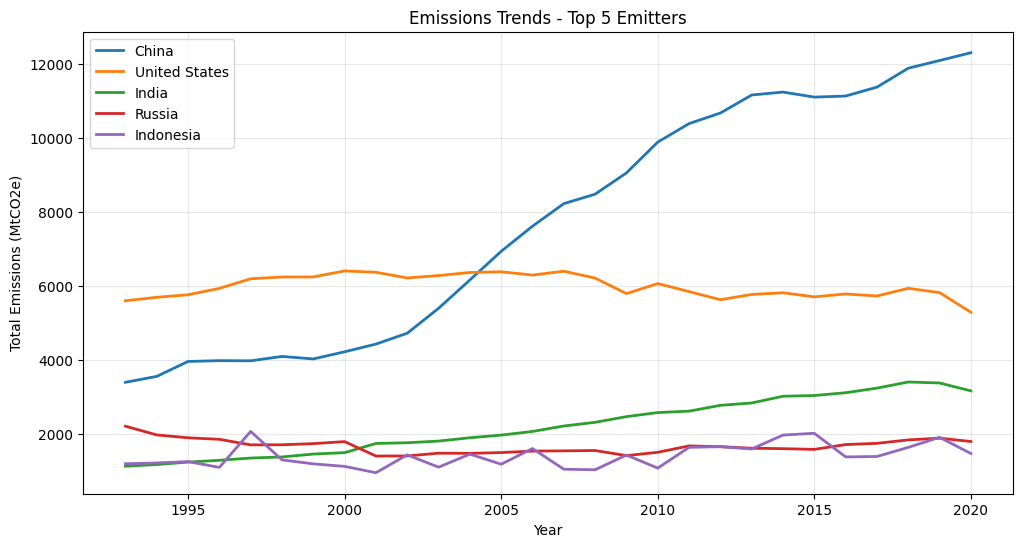

In [35]:
top5_countries = df_merged[df_merged['Year'] == latest_year].nlargest(5, 'Total_Emissions')['Country'].tolist()

plt.figure(figsize=(12, 6))
for country in top5_countries:
    data = df_merged[df_merged['Country'] == country]
    plt.plot(data['Year'], data['Total_Emissions'], label=country, linewidth=2)

plt.title('Emissions Trends - Top 5 Emitters')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

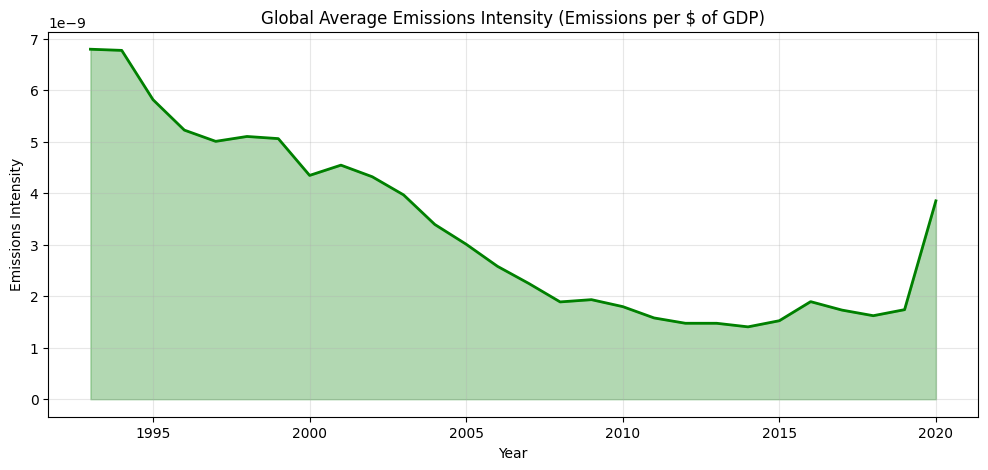

In [36]:
# Average emissions intensity per year globally
intensity_trend = df_merged.groupby('Year')['Emissions_intensity'].mean()

plt.figure(figsize=(12, 5))
plt.plot(intensity_trend.index, intensity_trend.values, linewidth=2, color='green')
plt.fill_between(intensity_trend.index, intensity_trend.values, alpha=0.3, color='green')
plt.title('Global Average Emissions Intensity (Emissions per $ of GDP)')
plt.xlabel('Year')
plt.ylabel('Emissions Intensity')
plt.grid(True, alpha=0.3)
plt.show()

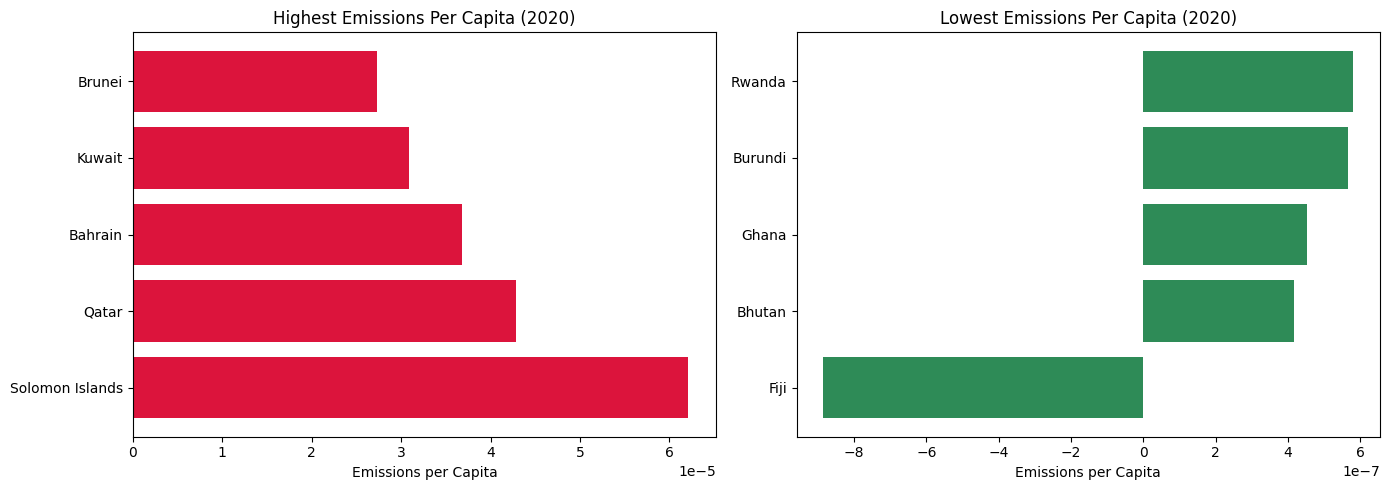

In [37]:
per_capita = df_merged[df_merged['Year'] == latest_year][['Country', 'Emissions_per_capita']].dropna()

top5_per_capita = per_capita.nlargest(5, 'Emissions_per_capita')
bottom5_per_capita = per_capita.nsmallest(5, 'Emissions_per_capita')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].barh(top5_per_capita['Country'], top5_per_capita['Emissions_per_capita'], color='crimson')
axes[0].set_title(f'Highest Emissions Per Capita ({latest_year})')
axes[0].set_xlabel('Emissions per Capita')

axes[1].barh(bottom5_per_capita['Country'], bottom5_per_capita['Emissions_per_capita'], color='seagreen')
axes[1].set_title(f'Lowest Emissions Per Capita ({latest_year})')
axes[1].set_xlabel('Emissions per Capita')

plt.tight_layout()
plt.show()

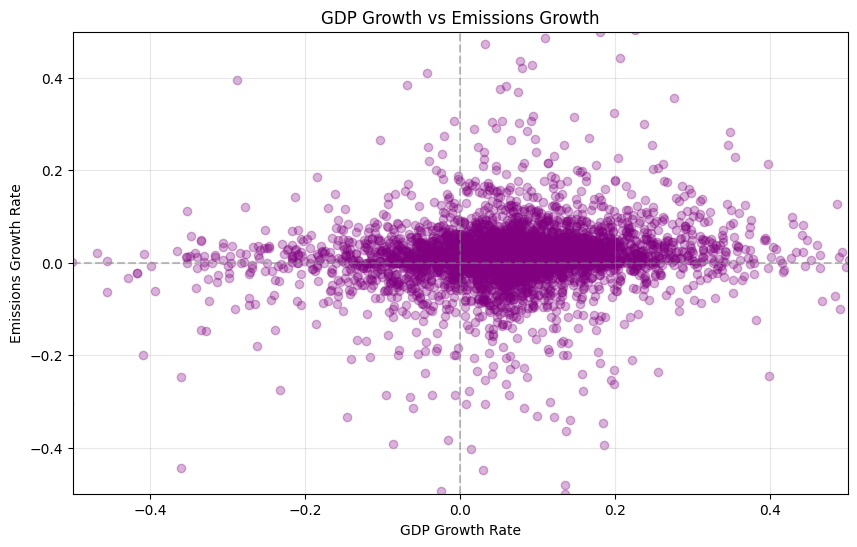

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['GDP_growth_1yr'], df_merged['Emissions_growth_1yr'], alpha=0.3, c='purple')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('GDP Growth Rate')
plt.ylabel('Emissions Growth Rate')
plt.title('GDP Growth vs Emissions Growth')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.grid(True, alpha=0.3)
plt.show()

In [39]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Total records: {len(df_merged)}")
print(f"Countries: {df_merged['Country'].nunique()}")
print(f"Year range: {df_merged['Year'].min()} - {df_merged['Year'].max()}")
print("\n--- Emissions Statistics ---")
print(df_merged['Total_Emissions'].describe())
print("\n--- Top 5 Cumulative Emitters (All Time) ---")
cumulative = df_merged.groupby('Country')['Total_Emissions'].sum().nlargest(5)
print(cumulative)

DATASET SUMMARY
Total records: 4284
Countries: 153
Year range: 1993 - 2020

--- Emissions Statistics ---
count     4284.000000
mean       242.491837
std        875.428794
min        -17.060000
25%          6.940000
50%         38.185000
75%        124.415000
max      12295.620000
Name: Total_Emissions, dtype: float64

--- Top 5 Cumulative Emitters (All Time) ---
Country
China            215401.98
United States    167760.98
India             62019.10
Brazil            48175.39
Russia            46927.78
Name: Total_Emissions, dtype: float64
